In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os  # Module for interacting with the operating system.
import numpy as np  # NumPy library for numerical operations.
import pandas as pd  # Pandas library for data manipulation and analysis.
import matplotlib.pyplot as plt  # Matplotlib for plotting graphs and visualizations.
import seaborn as sns  # Seaborn for statistical data visualization.
import librosa  # Librosa for audio and music analysis.
import librosa.display  # Librosa's module for displaying audio features.

# Module for displaying audio files directly in Jupyter notebooks.
from IPython.display import Audio  

# Keras modules for defining neural network callbacks and layers.
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
import tensorflow as tf  # TensorFlow library for deep learning.

# Keras modules for defining neural network architecture.
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Module for checking if an object is iterable.
from collections.abc import Iterable  

# Sklearn module for one-hot encoding categorical variables.
from sklearn.preprocessing import OneHotEncoder  

# TensorFlow module for reducing learning rate when a metric has stopped improving.
from tensorflow.keras.callbacks import ReduceLROnPlateau  

# TensorFlow module for defining neural network architecture.
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Flatten, BatchNormalization  

# Keras and TensorFlow modules for defining neural network layers and callbacks.
from keras import layers, callbacks  


i've deleted the code where i installed the above libraries just to skip the confusion.

In [3]:
Root_dir = 'https://drive.google.com/file/d/1sPCz03tL4NijYbV_wILLTRZh7C3nq32J/view?usp=drive_link'

In [4]:
import sys
import subprocess

# Function to install a Python package using pip if not already installed
def install_package(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Check if gdown is installed, install if not
try:
    import gdown
except ImportError:
    print("gdown is not installed. Installing now...")
    install_package("gdown")
    import gdown  # Import again after installation

import zipfile
import os

# Define the Google Drive file ID and download path
file_id = '1sPCz03tL4NijYbV_wILLTRZh7C3nq32J'
download_path = 'dataset.zip'
extract_path = 'extracted_dataset'

# Uncomment and run these lines to download the file from Google Drive (comment after first run)
# gdown.download(f'https://drive.google.com/uc?id={file_id}', download_path, quiet=False)

# Uncomment and run these lines to unzip the downloaded file (comment after first run)
# with zipfile.ZipFile(download_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_path)

# Define the root directory where the dataset is extracted
root_dir = extract_path

# Define paths to each sub-directory within the extracted dataset
crema_path = os.path.join(root_dir, "Crema")
ravdess_path = os.path.join(root_dir, "Ravdess", "audio_speech_actors_01-24")
savee_path = os.path.join(root_dir, "Savee")
tess_path = os.path.join(root_dir, "Tess")

# List the files in each sub-directory
crema_dir_list = os.listdir(crema_path)
ravdess_dir_list = os.listdir(ravdess_path)
savee_dir_list = os.listdir(savee_path)
tess_dir_list = os.listdir(tess_path)

# Print out the lists of files in each dataset sub-directory
print("Crema files:", crema_dir_list)
print("Ravdess files:", ravdess_dir_list)
print("Savee files:", savee_dir_list)
print("Tess files:", tess_dir_list)

Crema files: ['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav', '1001_IEO_DIS_LO.wav', '1001_IEO_DIS_MD.wav', '1001_IEO_FEA_HI.wav', '1001_IEO_FEA_LO.wav', '1001_IEO_FEA_MD.wav', '1001_IEO_HAP_HI.wav', '1001_IEO_HAP_LO.wav', '1001_IEO_HAP_MD.wav', '1001_IEO_NEU_XX.wav', '1001_IEO_SAD_HI.wav', '1001_IEO_SAD_LO.wav', '1001_IEO_SAD_MD.wav', '1001_IOM_ANG_XX.wav', '1001_IOM_DIS_XX.wav', '1001_IOM_FEA_XX.wav', '1001_IOM_HAP_XX.wav', '1001_IOM_NEU_XX.wav', '1001_IOM_SAD_XX.wav', '1001_ITH_ANG_XX.wav', '1001_ITH_DIS_XX.wav', '1001_ITH_FEA_XX.wav', '1001_ITH_HAP_XX.wav', '1001_ITH_NEU_XX.wav', '1001_ITH_SAD_XX.wav', '1001_ITS_ANG_XX.wav', '1001_ITS_DIS_XX.wav', '1001_ITS_FEA_XX.wav', '1001_ITS_HAP_XX.wav', '1001_ITS_NEU_XX.wav', '1001_ITS_SAD_XX.wav', '1001_IWL_ANG_XX.wav', '1001_IWL_DIS_XX.wav', '1001_IWL_FEA_XX.wav

Data PreProcessing

In [5]:
Ex_Crema_dir_list = crema_dir_list[:15]
Ex_Crema_dir_list

['1001_DFA_ANG_XX.wav',
 '1001_DFA_DIS_XX.wav',
 '1001_DFA_FEA_XX.wav',
 '1001_DFA_HAP_XX.wav',
 '1001_DFA_NEU_XX.wav',
 '1001_DFA_SAD_XX.wav',
 '1001_IEO_ANG_HI.wav',
 '1001_IEO_ANG_LO.wav',
 '1001_IEO_ANG_MD.wav',
 '1001_IEO_DIS_HI.wav',
 '1001_IEO_DIS_LO.wav',
 '1001_IEO_DIS_MD.wav',
 '1001_IEO_FEA_HI.wav',
 '1001_IEO_FEA_LO.wav',
 '1001_IEO_FEA_MD.wav']

In [6]:
Ex_Ravdess_dir_list = ravdess_dir_list[:15]
Ex_Ravdess_dir_list

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15']

In [7]:
Ex_Savee_dir_list = savee_dir_list[:15]
Ex_Savee_dir_list

['DC_a01.wav',
 'DC_a02.wav',
 'DC_a03.wav',
 'DC_a04.wav',
 'DC_a05.wav',
 'DC_a06.wav',
 'DC_a07.wav',
 'DC_a08.wav',
 'DC_a09.wav',
 'DC_a10.wav',
 'DC_a11.wav',
 'DC_a12.wav',
 'DC_a13.wav',
 'DC_a14.wav',
 'DC_a15.wav']

In [8]:
Ex_Tess_dir_list = tess_dir_list[:15]
Ex_Tess_dir_list

['OAF_angry',
 'OAF_disgust',
 'OAF_Fear',
 'OAF_happy',
 'OAF_neutral',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

From here onwards i'll work with Ravdess data

In [9]:
import jinja2

#Define empty list for Emotions and Paths
emotions_ravdess = []
path_ravdess = []

for actor_dir in ravdess_dir_list:
    actor_path = os.path.join(ravdess_path, actor_dir)
    actor_files = os.listdir(actor_path)
    
    for file in actor_files:
        # Extract emotion label from file name
        part = file.split('.')[0].split('-')
        emotion = int(part[2])  # Third part in the file name
        
        # Append emotion label and full file path
        emotions_ravdess.append(emotion)
        path_ravdess.append(os.path.join(actor_path, file))
    
# Create DataFrame from lists
emotion_ravdess_df = pd.DataFrame(emotions_ravdess, columns=['Emotions'])
path_ravdess_df = pd.DataFrame(path_ravdess, columns=['Path'])
Ravdess_df = pd.concat([emotion_ravdess_df, path_ravdess_df], axis=1)

# Mapping integer labels to emotions
emotion_mapping = {
    1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad',
    5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'
}
Ravdess_df['Emotions'] = Ravdess_df['Emotions'].map(emotion_mapping)

# Displaying the first few rows with styled output
Ravdess_df.head().style.set_properties(**{
    'background-color': '#9490ff',
    'color': 'black',
    'border-color': 'black'
})


,Emotions,Path
0,neutral,extracted_dataset\Ravdess\audio_speech_actors_01-24\Actor_01\03-01-01-01-01-01-01.wav
1,neutral,extracted_dataset\Ravdess\audio_speech_actors_01-24\Actor_01\03-01-01-01-01-02-01.wav
2,neutral,extracted_dataset\Ravdess\audio_speech_actors_01-24\Actor_01\03-01-01-01-02-01-01.wav
3,neutral,extracted_dataset\Ravdess\audio_speech_actors_01-24\Actor_01\03-01-01-01-02-02-01.wav
4,calm,extracted_dataset\Ravdess\audio_speech_actors_01-24\Actor_01\03-01-02-01-01-01-01.wav


after multiple attempts i was unable to work with jinja so this was the approach i tried.

In [10]:
import importlib

def install_package(package_name):
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])

def check_install_and_import(package_name):
    try:
        importlib.import_module(package_name)
    except ImportError:
        print(f"{package_name} is not installed. Installing now...")
        install_package(package_name)
    finally:
        globals()[package_name] = importlib.import_module(package_name)

# Check and install jinja2 if not already installed
check_install_and_import("jinja2")


In [11]:
#obtain unique values from the "Emotions" column of Ravdess_df and list them for each column in the DataFrame.
[Ravdess_df["Emotions"].unique().tolist() for i in Ravdess_df.columns]

[['neutral', 'calm', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise'],
 ['neutral', 'calm', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise']]

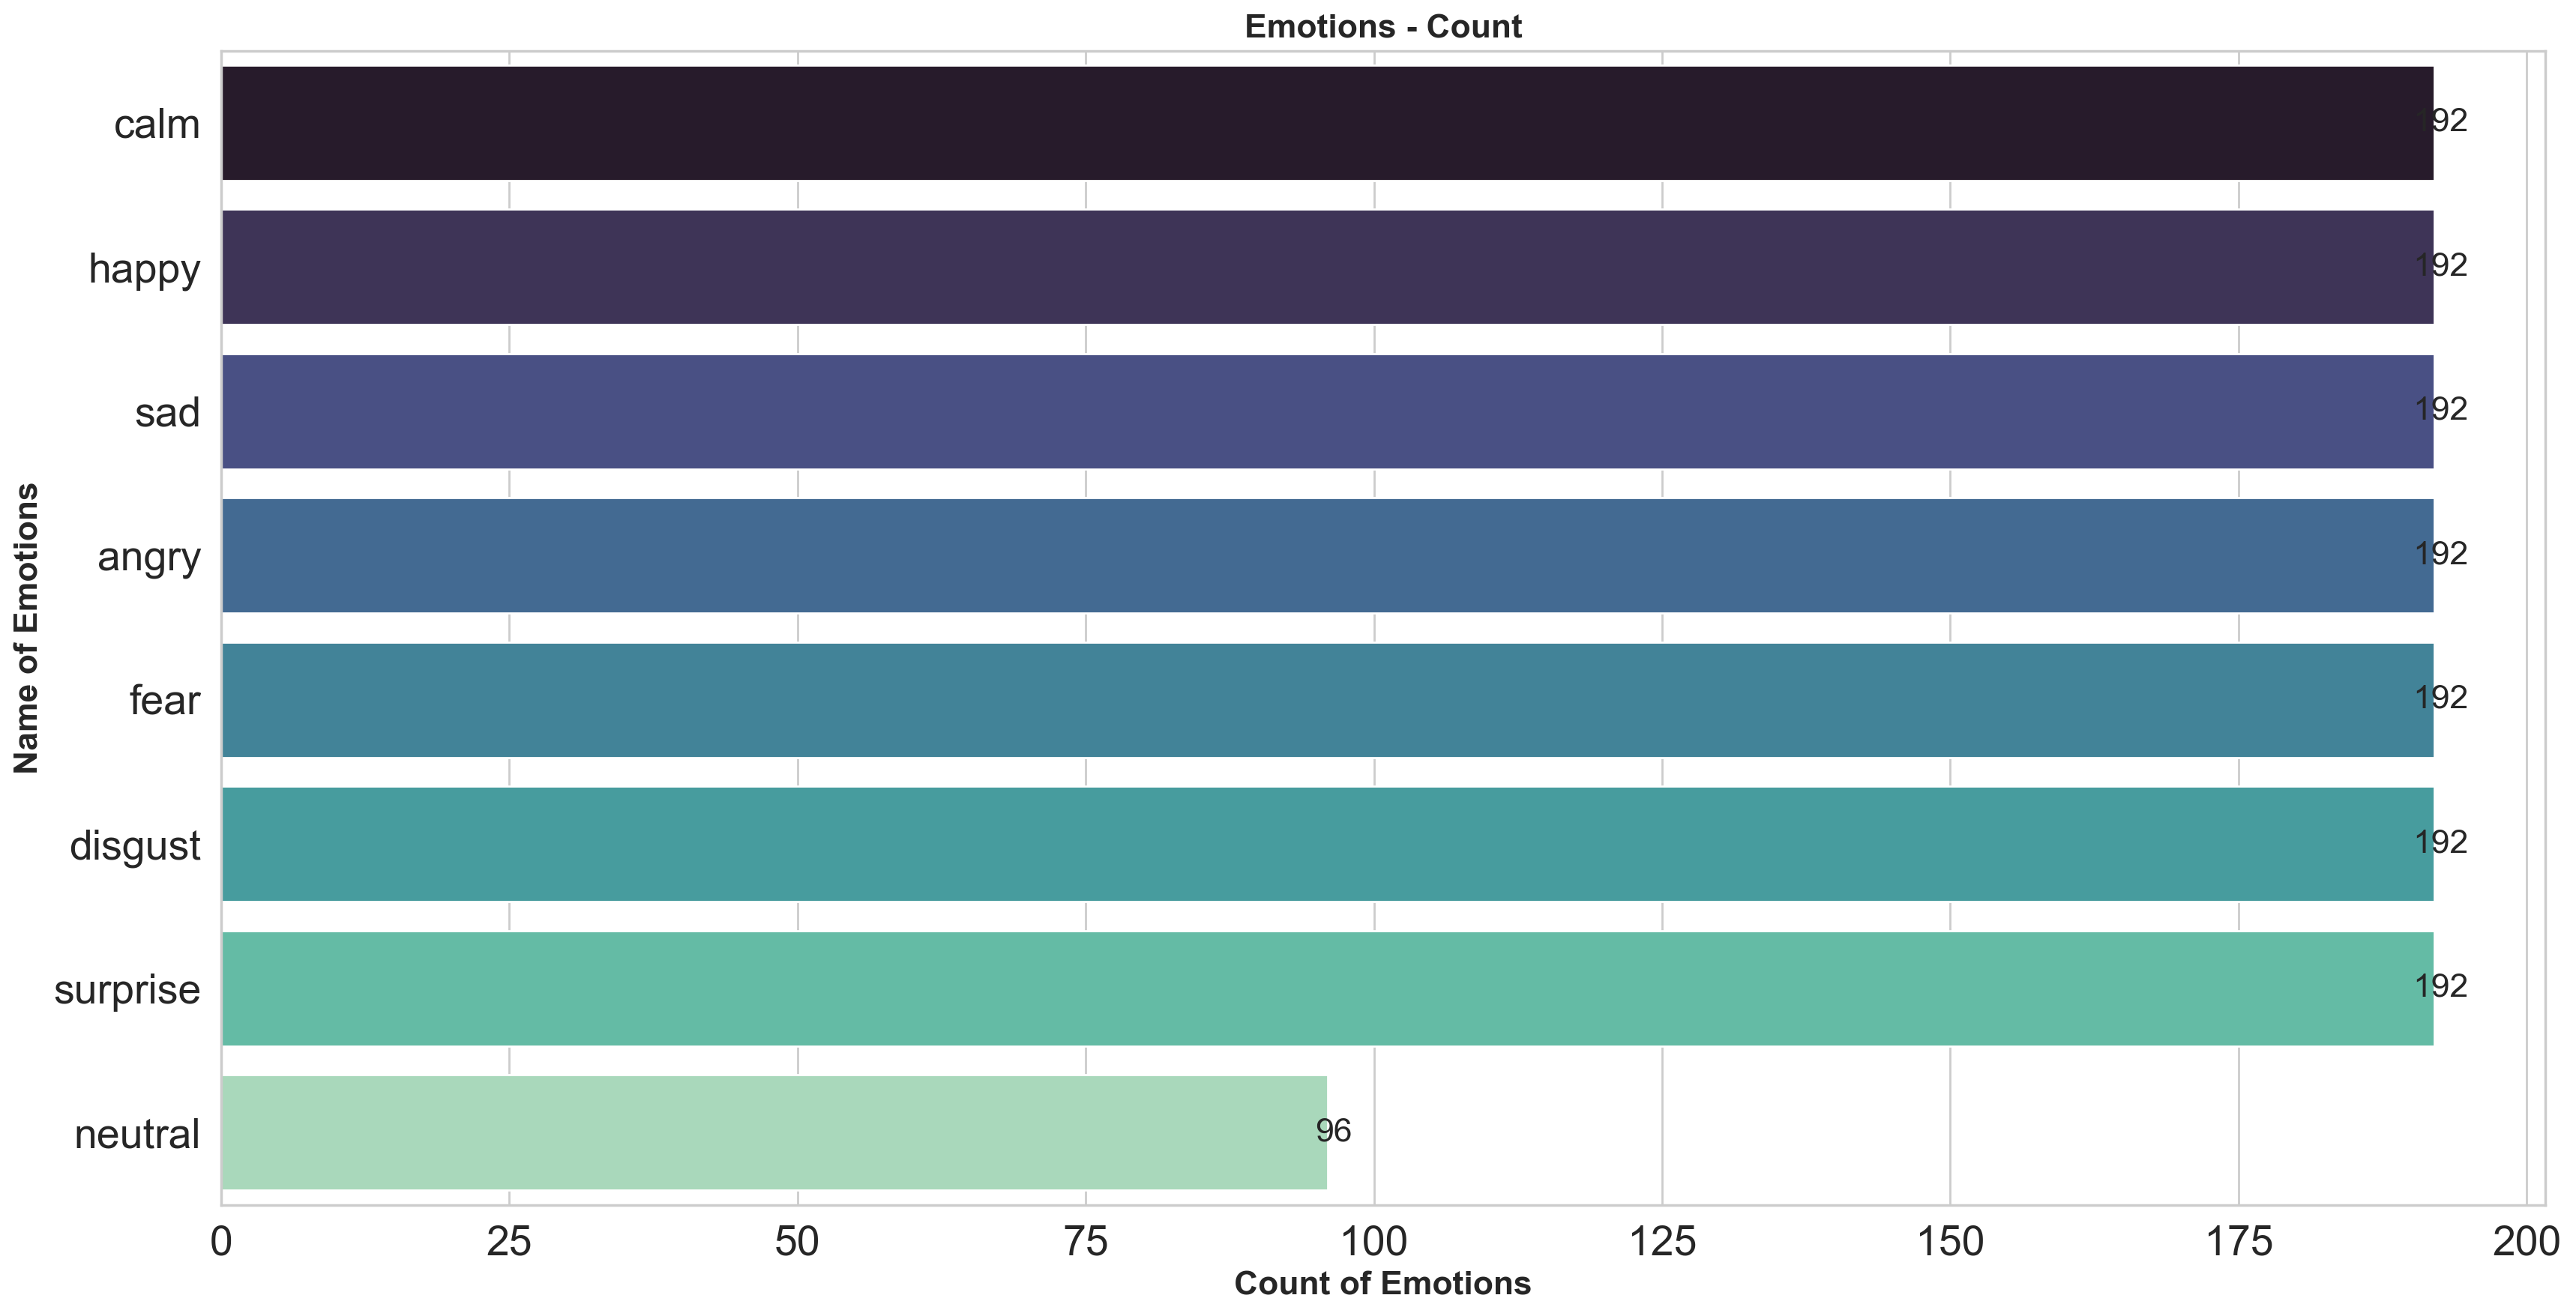

In [12]:
# Define font1 dictionary 
font1 = {'fontsize': 16, 'fontweight': 'bold'}

# Set the style and color codes for seaborn
sns.set(style="whitegrid", color_codes=True)

# Create a figure with specified size and DPI
plt.figure(figsize=(20, 10), dpi=200)

# Count the occurrences of each emotion and create a bar plot
Count_emotion = Ravdess_df['Emotions'].value_counts()[:]
ax = sns.barplot(x=Count_emotion.values, y=Count_emotion.index, palette="mako")

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width() + 0.5, p.get_y() + p.get_height() / 2), ha='center', va='center', fontsize=16)

# Customize ticks and labels
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions", fontdict=font1)
plt.xlabel("Count of Emotions", fontdict=font1)
plt.title("Emotions - Count", fontdict=font1)

# Display the plot
plt.show()


Data Preparation

In [13]:
Ravdess_df

,Emotions,Path
0,neutral,extracted_dataset\Ravdess\audio_speech_actors_...
1,neutral,extracted_dataset\Ravdess\audio_speech_actors_...
2,neutral,extracted_dataset\Ravdess\audio_speech_actors_...
3,neutral,extracted_dataset\Ravdess\audio_speech_actors_...
4,calm,extracted_dataset\Ravdess\audio_speech_actors_...
...,...,...
1435,surprise,extracted_dataset\Ravdess\audio_speech_actors_...
1436,surprise,extracted_dataset\Ravdess\audio_speech_actors_...
1437,surprise,extracted_dataset\Ravdess\audio_speech_actors_...
1438,surprise,extracted_dataset\Ravdess\audio_speech_actors_...


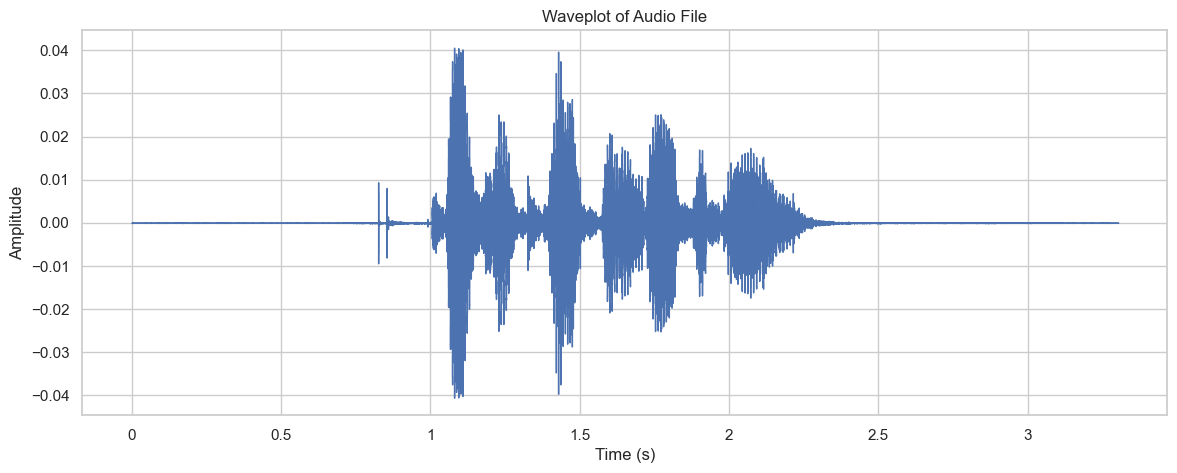

In [14]:
from IPython.display import Audio, display

# Select an example audio file path
audio_file_path = Ravdess_df['Path'].iloc[0]  # you can adjust the index as you want i have selected 0 so it will select the first file.

# Check if the file exists
if os.path.exists(audio_file_path):
    # Display the audio player
    display(Audio(audio_file_path))
    
    # Load the audio file using librosa
    y, sr = librosa.load(audio_file_path, sr=None)
    
    # Plot the waveplot
    plt.figure(figsize=(14, 5))
    plt.title('Waveplot of Audio File')
    librosa.display.waveshow(y, sr=sr)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()
else:
    print(f"File {audio_file_path} does not exist.")


This code plots the waveplot for one sample of each emotion present in my dataset. The waveplots will help me visualize the differences in the audio signals corresponding to different emotions.

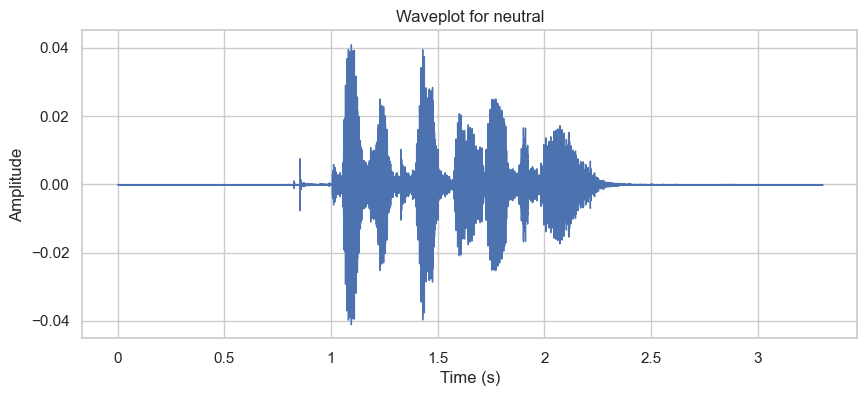

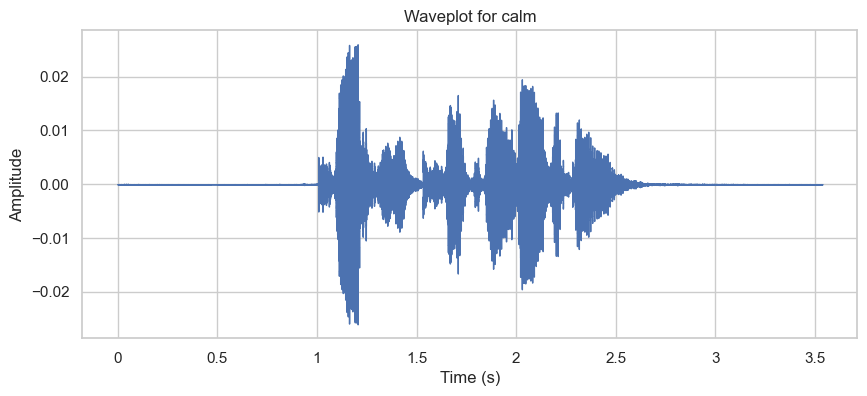

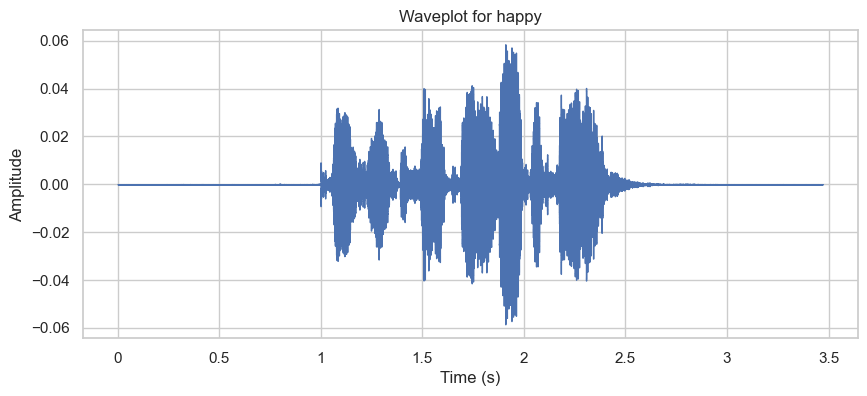

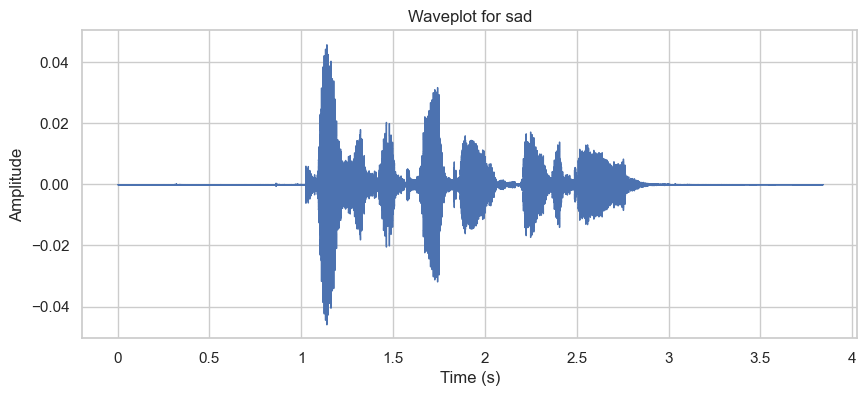

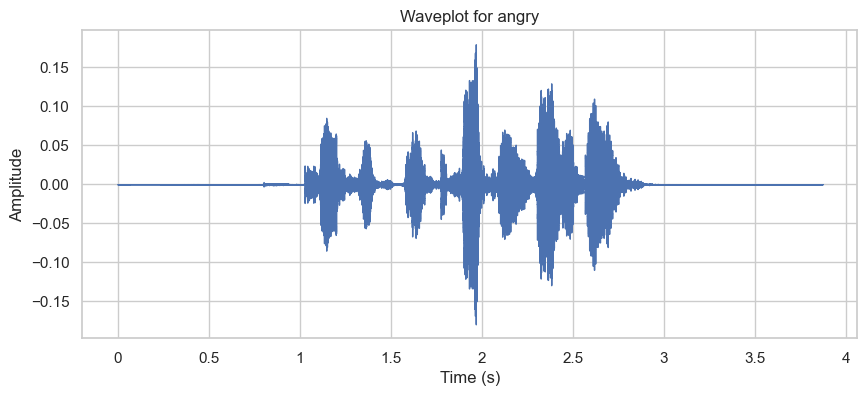

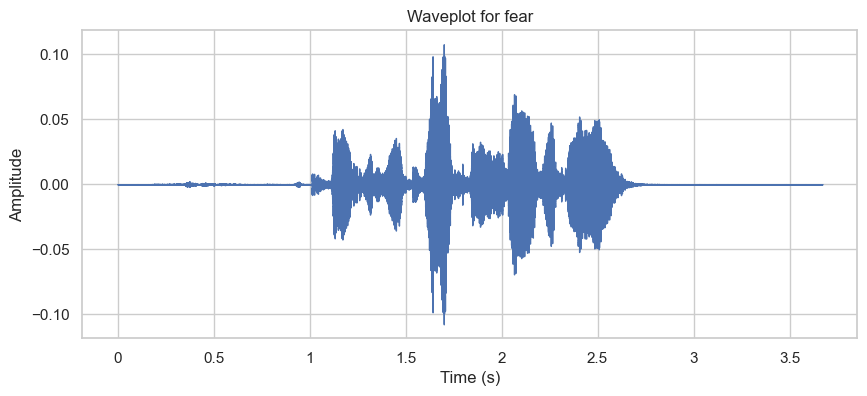

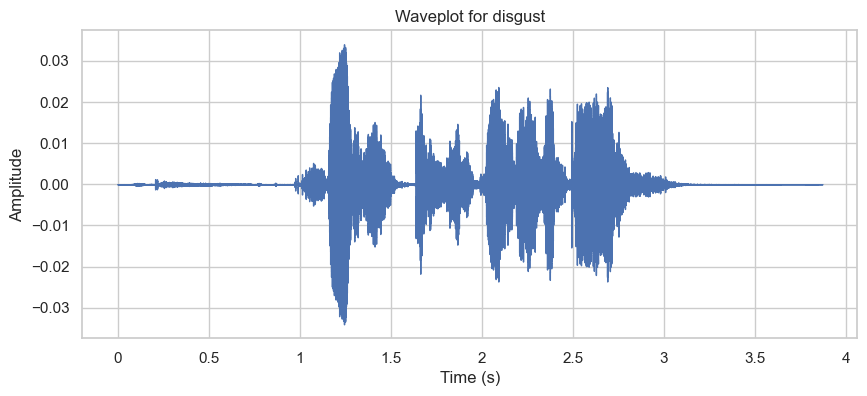

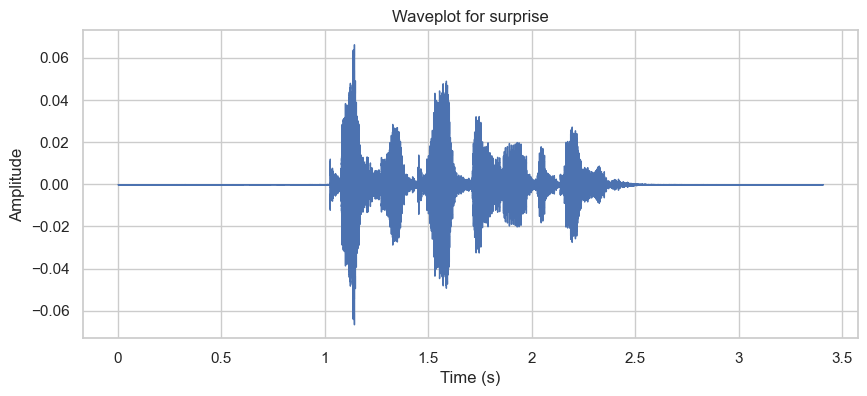

In [15]:
# Define a function to plot waveplot for a given audio file
def plot_waveplot(audio_path, emotion):
    y, sr = librosa.load(audio_path, sr=22050)
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Waveplot for {emotion}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# List of unique emotions in the dataset
unique_emotions = Ravdess_df['Emotions'].unique()

# Dictionary to store paths of one sample for each emotion
sample_paths = {}

# Iterate through each unique emotion and get one sample path
for emotion in unique_emotions:
    sample_path = Ravdess_df[Ravdess_df['Emotions'] == emotion]['Path'].iloc[0]
    sample_paths[emotion] = sample_path

# Plot waveplot for each sample
for emotion, path in sample_paths.items():
    if os.path.exists(path):
        plot_waveplot(path, emotion)
    else:
        print(f"File {path} does not exist.")


This code defines a function plot_log_mel_spectrogram to visualize the Log-Mel Spectrogram of audio files based on their emotion labels.

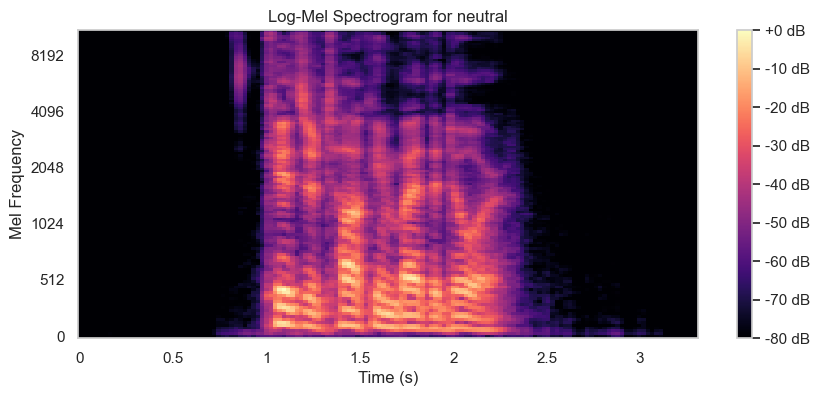

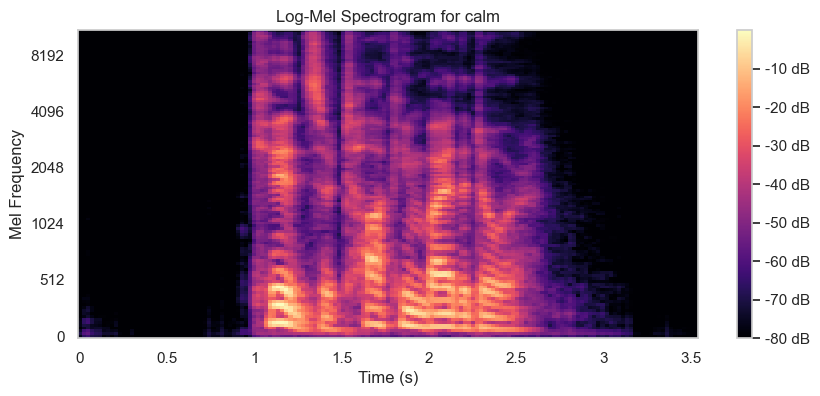

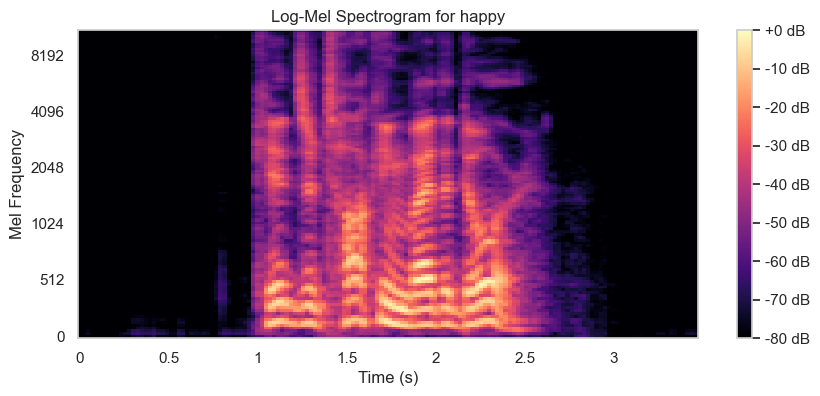

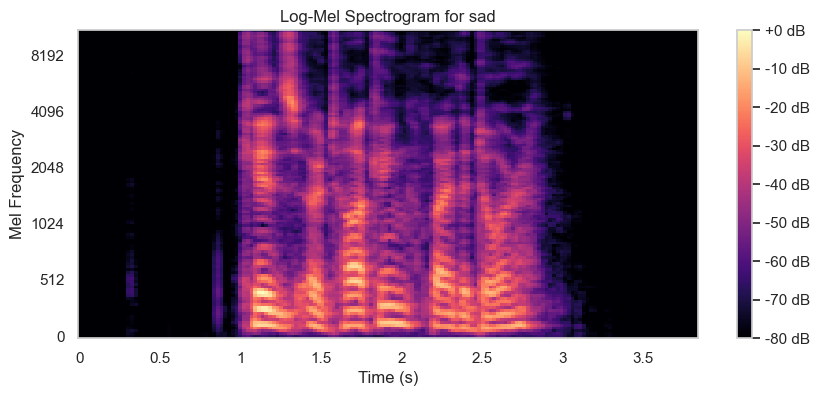

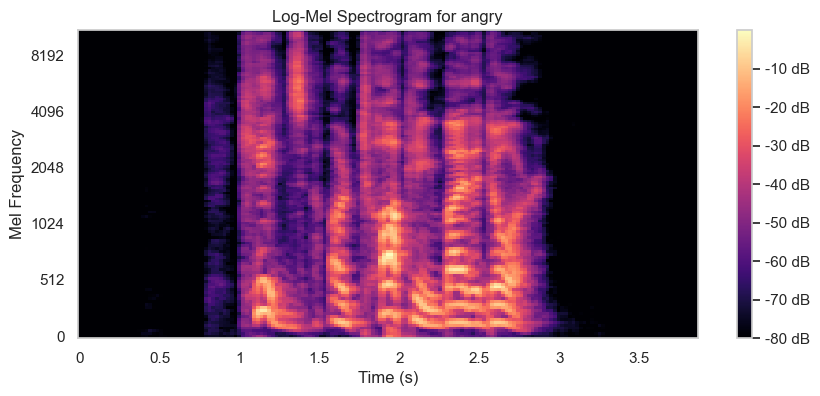

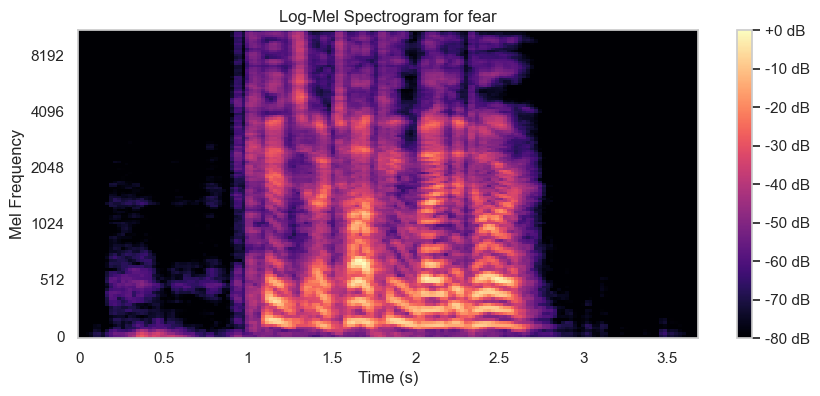

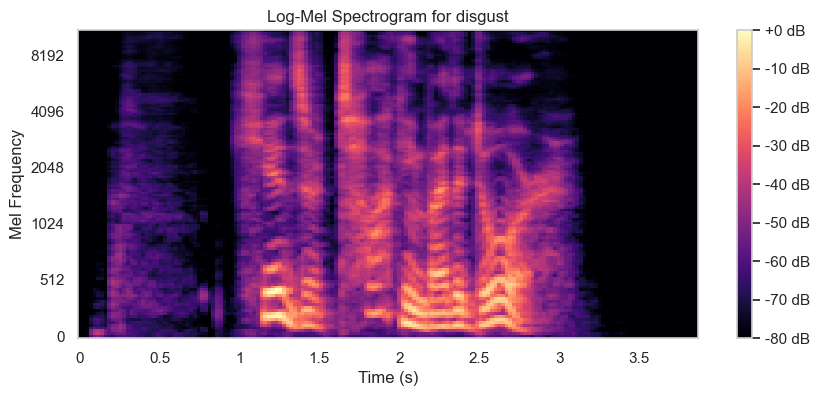

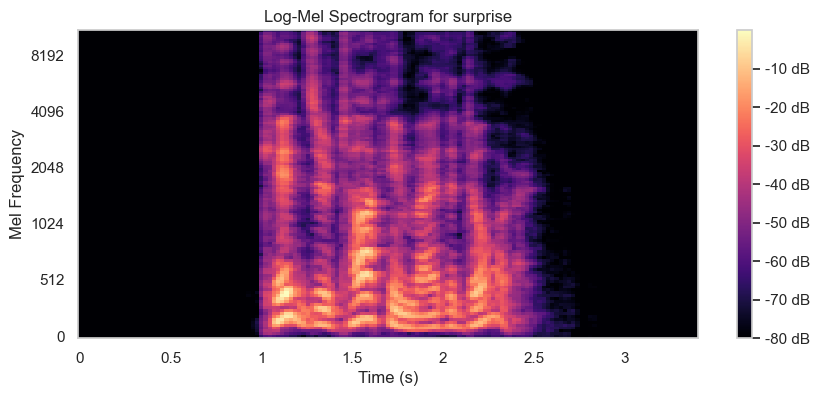

In [16]:
# Define a function to plot Log-Mel Spectrogram for a given audio file
def plot_log_mel_spectrogram(audio_path, emotion):
    y, sr = librosa.load(audio_path, sr=22050)
    # Compute the Mel Spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    # Convert to Log-Mel Spectrogram
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Log-Mel Spectrogram for {emotion}')
    plt.xlabel('Time (s)')
    plt.ylabel('Mel Frequency')
    plt.show()

# List of unique emotions in the dataset
unique_emotions = Ravdess_df['Emotions'].unique()

# Dictionary to store paths of one sample for each emotion
sample_paths = {}

# Iterate through each unique emotion and get one sample path
for emotion in unique_emotions:
    sample_path = Ravdess_df[Ravdess_df['Emotions'] == emotion]['Path'].iloc[0]
    sample_paths[emotion] = sample_path

# Plot Log-Mel Spectrogram for each sample
for emotion, path in sample_paths.items():
    if os.path.exists(path):
        plot_log_mel_spectrogram(path, emotion)
    else:
        print(f"File {path} does not exist.")


Before modeling, I want to structure the data into a Pandas DataFrame by creating a directory of the audio files, then create a function to extract the emotion label and gender label for each file (although I am only interested in classifying emotion, I also want to extract the gender label in case I should decide to attempt to classify gender as well), and then lastly put the extracted labels with the associated filepaths into a DataFrame audio_df.

In [17]:
# Define a function to extract emotion and gender labels from the filename
def extract_labels(file_path):
    # Split the file name to extract parts
    file_name = os.path.basename(file_path)
    parts = file_name.split('.')[0].split('-')
    
    # Extract emotion label (part[2])
    emotion = int(parts[2])
    
    # Extract gender label based on actor ID (part[6])
    actor_id = int(parts[6])
    gender = 'male' if actor_id % 2 == 0 else 'female'
    
    return emotion, gender

# List of file paths
file_paths = Ravdess_df['Path'].tolist()

# List to store extracted labels and file paths
data = []

# Iterate through file paths, extract labels, and append to the data list
for file_path in file_paths:
    emotion, gender = extract_labels(file_path)
    data.append([file_path, emotion, gender])

# Convert the list to a DataFrame
audio_df = pd.DataFrame(data, columns=['Path', 'Emotion', 'Gender'])

# Map emotion integers to emotion labels
emotion_mapping = {
    1: 'neutral',
    2: 'calm',
    3: 'happy',
    4: 'sad',
    5: 'angry',
    6: 'fear',
    7: 'disgust',
    8: 'surprise'
}

audio_df['Emotion'] = audio_df['Emotion'].map(emotion_mapping)

# Display the first few rows of the DataFrame
audio_df.head()


,Path,Emotion,Gender
0,extracted_dataset\Ravdess\audio_speech_actors_...,neutral,female
1,extracted_dataset\Ravdess\audio_speech_actors_...,neutral,female
2,extracted_dataset\Ravdess\audio_speech_actors_...,neutral,female
3,extracted_dataset\Ravdess\audio_speech_actors_...,neutral,female
4,extracted_dataset\Ravdess\audio_speech_actors_...,calm,female


Next, most importantly I used librosa’s librosa.feature.melspectrogram and librosa.power_to_db to obtain the log-mel spectrogram values of each audio file and then averaged the spectrogram values and loaded the data into a new Dataframe labeled df.

In [18]:
# Define a function to compute the log-mel spectrogram
def compute_log_mel_spectrogram(file_path, n_mels=128, fmax=8000):
    try:
        # Load the audio file
        y, sr = librosa.load(file_path, sr=None)
        
        # Compute the mel spectrogram
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, fmax=fmax)
        
        # Convert to log scale (dB)
        log_S = librosa.power_to_db(S, ref=np.max)
        
        # Average the log-mel spectrogram values
        avg_log_mel_spectrogram = np.mean(log_S, axis=1)
        
        return avg_log_mel_spectrogram
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# List to store the features and labels
data = []

# Iterate through the DataFrame and compute features for each file
for index, row in audio_df.iterrows():
    file_path = row['Path']
    emotion = row['Emotion']
    gender = row['Gender']
    
    features = compute_log_mel_spectrogram(file_path)
    if features is not None:
        data.append([features, emotion, gender])

# Convert the list to a DataFrame
df = pd.DataFrame(data, columns=['Features', 'Emotion', 'Gender'])

# Display the first few rows of the DataFrame
df.head()


,Features,Emotion,Gender
0,"[-68.97525, -61.75678, -56.70619, -54.013634, ...",neutral,female
1,"[-68.62844, -61.587135, -57.264484, -54.234554...",neutral,female
2,"[-68.92343, -63.07218, -57.598797, -53.859425,...",neutral,female
3,"[-68.708984, -61.646687, -56.032238, -52.74247...",neutral,female
4,"[-65.75864, -59.228634, -54.62372, -51.40065, ...",calm,female


Data Preparing

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convert features to numpy arrays if needed
df['Features'] = df['Features'].apply(np.array)

# Label encoding for Emotion and Gender
emotion_encoder = LabelEncoder()
gender_encoder = LabelEncoder()

df['Emotion_Encoded'] = emotion_encoder.fit_transform(df['Emotion'])
df['Gender_Encoded'] = gender_encoder.fit_transform(df['Gender'])

# Separate features (X) and labels (y)
X = np.array(df['Features'].tolist())  # Features as numpy array
y_emotion = np.array(df['Emotion_Encoded'])  # Emotion labels as numpy array
y_gender = np.array(df['Gender_Encoded'])  # Gender labels as numpy array

# Split the data into train and test sets
X_train, X_test, y_emotion_train, y_emotion_test, y_gender_train, y_gender_test = train_test_split(
    X, y_emotion, y_gender, test_size=0.2, random_state=42)

# Print shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_emotion_train shape:", y_emotion_train.shape)
print("y_emotion_test shape:", y_emotion_test.shape)
print("y_gender_train shape:", y_gender_train.shape)
print("y_gender_test shape:", y_gender_test.shape)

X_train shape: (1152, 128)
X_test shape: (288, 128)
y_emotion_train shape: (1152,)
y_emotion_test shape: (288,)
y_gender_train shape: (1152,)
y_gender_test shape: (288,)


Normalize the data - to improve model stability and performance

In [20]:
# Compute mean and std from X_train
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

# Normalize using mean and std
X_train_normalized = (X_train - mean) / std
X_test_normalized = (X_test - mean) / std

In [21]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [22]:
# Initialize LabelEncoders
label_encoder_emotion = LabelEncoder()
label_encoder_gender = LabelEncoder()

# Fit and transform on the training labels for emotion
y_emotion_train_encoded = label_encoder_emotion.fit_transform(y_emotion_train)

# Transform the test labels for emotion (only transform on test to prevent data leakage)
y_emotion_test_encoded = label_encoder_emotion.transform(y_emotion_test)

# Fit and transform on the training labels for gender
y_gender_train_encoded = label_encoder_gender.fit_transform(y_gender_train)

# Transform the test labels for gender (only transform on test to prevent data leakage)
y_gender_test_encoded = label_encoder_gender.transform(y_gender_test)

# Print the classes that were encoded for emotion and gender
print("Encoded emotion classes:", label_encoder_emotion.classes_)
print("Encoded gender classes:", label_encoder_gender.classes_)

# Check the shapes of the encoded labels for emotion and gender
print("Shape of y_emotion_train_encoded:", y_emotion_train_encoded.shape)
print("Shape of y_emotion_test_encoded:", y_emotion_test_encoded.shape)
print("Shape of y_gender_train_encoded:", y_gender_train_encoded.shape)
print("Shape of y_gender_test_encoded:", y_gender_test_encoded.shape)

Encoded emotion classes: [0 1 2 3 4 5 6 7]
Encoded gender classes: [0 1]
Shape of y_emotion_train_encoded: (1152,)
Shape of y_emotion_test_encoded: (288,)
Shape of y_gender_train_encoded: (1152,)
Shape of y_gender_test_encoded: (288,)


This confirms that my labels have been successfully encoded and are ready for further use in machine learning models.

In [23]:
# Reshape X_train and X_test to 3D tensors
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

# Print the new shapes to verify
print("X_train_cnn shape:", X_train_cnn.shape)
print("X_test_cnn shape:", X_test_cnn.shape)

X_train_cnn shape: (1152, 128, 1)
X_test_cnn shape: (288, 128, 1)


Dummy Classifier

In [24]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Create dummy classifier
dummy_clf = DummyClassifier(strategy="stratified", random_state=42)

# Train the classifier
dummy_clf.fit(X_train, y_emotion_train)

# Predict on test data
y_pred_dummy = dummy_clf.predict(X_test)

# Calculate accuracy
accuracy_dummy = accuracy_score(y_emotion_test, y_pred_dummy)
print(f"Dummy Classifier Accuracy: {accuracy_dummy * 100:.2f}%")

Dummy Classifier Accuracy: 11.46%


In [25]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
tree_clf.fit(X_train, y_emotion_train)

# Predict on test data
y_pred_tree = tree_clf.predict(X_test)

# Calculate accuracy
accuracy_tree = accuracy_score(y_emotion_test, y_pred_tree)
print(f"Decision Tree Classifier Accuracy: {accuracy_tree * 100:.2f}%")

Decision Tree Classifier Accuracy: 31.25%


1D CNN Model

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define the number of classes (emotions)
num_classes = len(np.unique(y_emotion_train))  

# Define model architecture
model = Sequential([
    # First Conv1D layer
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    
    # Second Conv1D layer
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    
    # Third Conv1D layer
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    
    # Flatten layer to transition from convolutional to fully connected layers
    Flatten(),
    
    # Output layer
    Dense(units=num_classes, activation='softmax')  # Adjust num_classes based on your problem
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' for one-hot encoded labels
              metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 126, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 63, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 61, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 28, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 14, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │        14,344 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,384 (177.28 KB)

 Trainable params: 45,384 (177.28 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.1219 - loss: 6.0966 - val_accuracy: 0.1111 - val_loss: 2.0751
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1080 - loss: 2.4060 - val_accuracy: 0.1215 - val_loss: 2.0764
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1330 - loss: 2.1846 - val_accuracy: 0.1146 - val_loss: 2.0838
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1336 - loss: 2.1181 - val_accuracy: 0.1215 - val_loss: 2.0784
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1360 - loss: 2.1021 - val_accuracy: 0.1111 - val_loss: 2.0720
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1392 - loss: 2.0964 - val_accuracy: 0.1493 - val_loss: 2.0779
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1391 - loss: 2.0920 - val_accuracy: 0.1354 - val_loss: 2.0760
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1264 - loss: 2.0887 - val_accuracy: 0.1458 - v

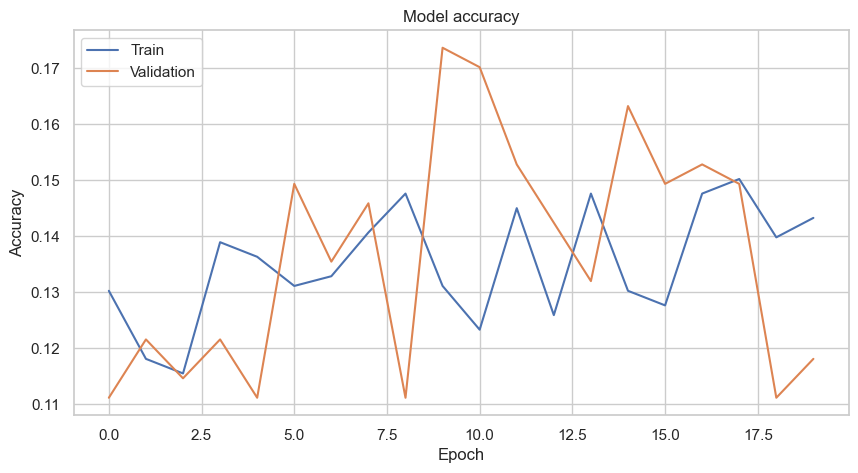

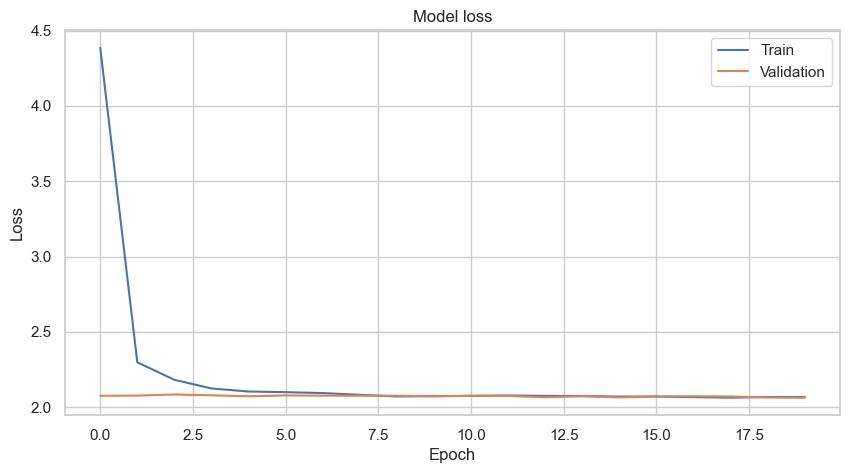

In [27]:
epochs = 20  # Define the number of epochs
batch_size = 32  # Define the batch size

history = model.fit(X_train, y_emotion_train_encoded, validation_data=(X_test, y_emotion_test_encoded), epochs=epochs, batch_size=batch_size)

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()

It seems like the training accuracy and validation accuracy are both around 11%, and the loss values are relatively high. This indicates that the model is not learning effectively from the data.

In [28]:
print("Shape of X_train_cnn:", X_train_cnn.shape)
print("Shape of X_test_cnn:", X_test_cnn.shape)
print("Number of classes (num_classes):", num_classes)

Shape of X_train_cnn: (1152, 128, 1)
Shape of X_test_cnn: (288, 128, 1)
Number of classes (num_classes): 8


looks like the shapes of X_train_cnn and X_test_cnn are correct (batch_size, sequence_length, 1), and the number of classes num_classes is 8, which matches the output layer's units in my model.

Testing the model and getting results

In [29]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_emotion_test_encoded, batch_size=batch_size)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0992 - loss: 2.0664     
Test Loss: 2.062250852584839
Test Accuracy: 0.1180555522441864


In [30]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Convert predictions from one-hot encoded back to label
y_pred_labels = np.argmax(y_pred, axis=1)

# Actual test labels are already integer encoded, so no need to convert
y_true_labels = y_emotion_test_encoded

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


In [31]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_true_labels, y_pred_labels, target_names=emotion_encoder.classes_)
print(report)

              precision    recall  f1-score   support

       angry       0.00      0.00      0.00        42
        calm       0.00      0.00      0.00        44
     disgust       0.00      0.00      0.00        32
        fear       0.00      0.00      0.00        32
       happy       0.12      1.00      0.21        34
     neutral       0.00      0.00      0.00        20
         sad       0.00      0.00      0.00        39
    surprise       0.00      0.00      0.00        45

    accuracy                           0.12       288
   macro avg       0.01      0.12      0.03       288
weighted avg       0.01      0.12      0.02       288



Data Augmentation

In [33]:
# Load the audio file
y, sr = librosa.load(file_path)

In [34]:
# Function to add Gaussian noise to audio
def add_gaussian_noise(y, noise_factor=0.005):
    # Generate Gaussian noise
    noise = np.random.randn(len(y))
    
    # Ensure the noise has the same shape as y
    augmented_y = y + noise_factor * noise
    return augmented_y

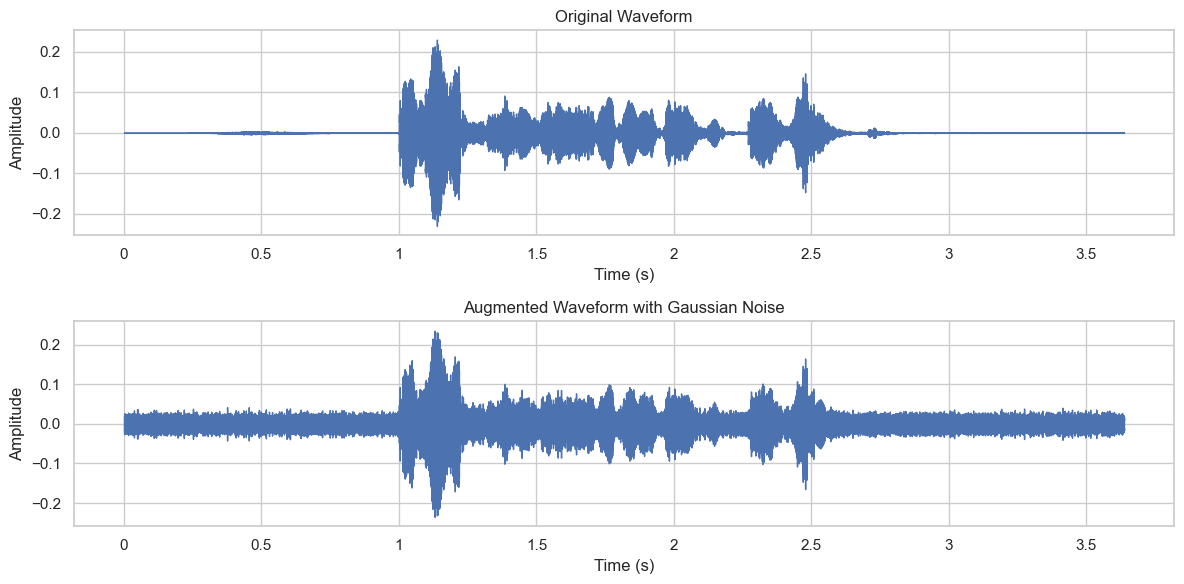

In [35]:
# Add Gaussian noise to the audio
augmented_y = add_gaussian_noise(y, noise_factor=0.01)  # Adjust noise_factor as needed

# Plot original and augmented waveforms
plt.figure(figsize=(12, 6))

# Original waveform
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Augmented waveform
plt.subplot(2, 1, 2)
librosa.display.waveshow(augmented_y, sr=sr)
plt.title('Augmented Waveform with Gaussian Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [36]:
# Play the audio
y, sr = librosa.load(file_path)
Audio(data=y, rate=sr)

In [37]:
# Apply time stretching
stretch_factor = 1.5  # This is the factor by which the speed will be increased. <1 to slow down, >1 to speed up
y_stretched = librosa.effects.time_stretch(y, rate=stretch_factor)

# Play the stretched audio
Audio(data=y_stretched, rate=sr)

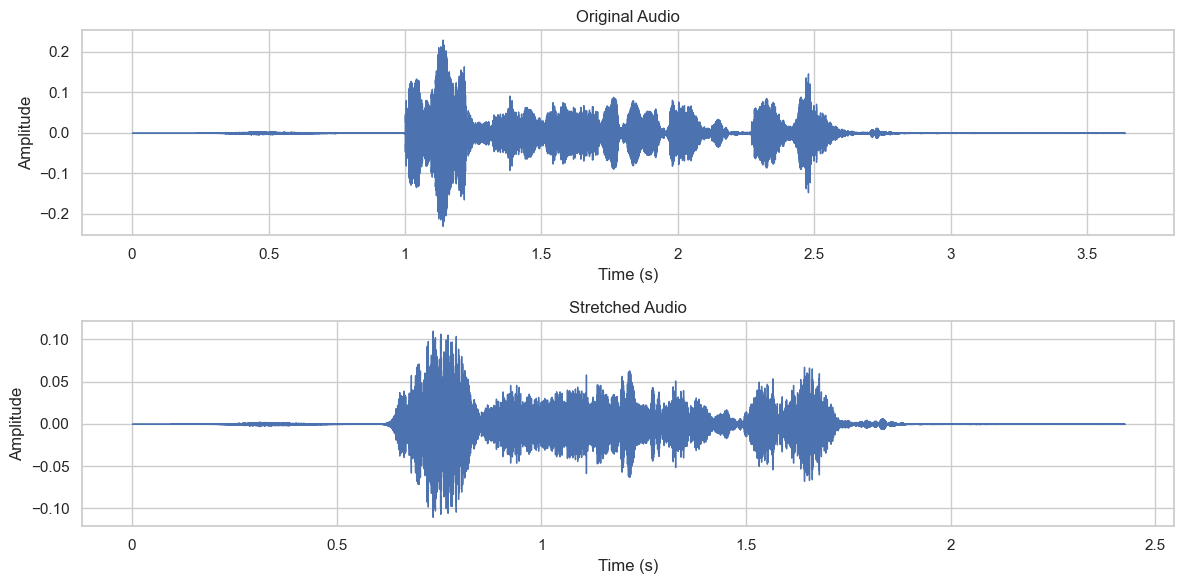

In [38]:
# Plot the waveplot of the original audio
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the waveplot of the stretched audio
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_stretched, sr=sr)
plt.title('Stretched Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

Modified Audio:


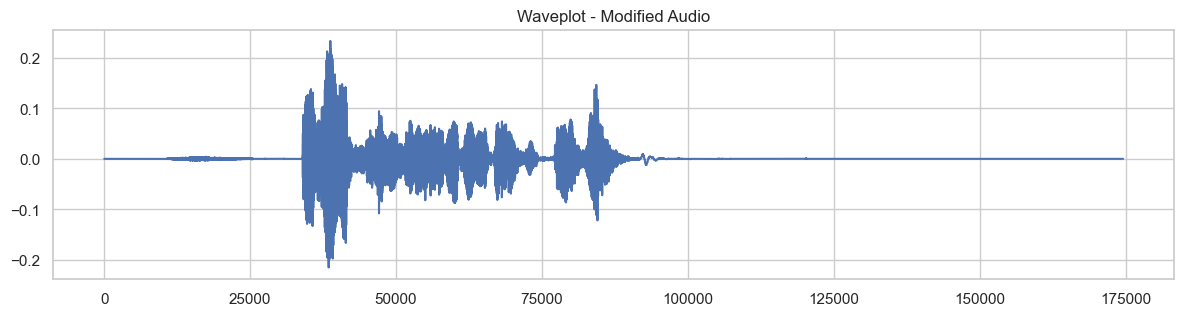

In [39]:
import librosa
import numpy as np
from IPython.display import Audio, display

# Function to increase speed and pitch
def speedNpitch(x):
    length_change = np.random.uniform(low=0.8, high=1)
    speed_fac = 1.4 / length_change 
    tmp = np.interp(np.arange(0, len(x), speed_fac), np.arange(0, len(x)), x)
    minlen = min(x.shape[0], tmp.shape[0])
    x *= 0
    x[0:minlen] = tmp[0:minlen]
    return x

# Function to process audio file, apply speed and pitch change, and play audio
def process_audio_file(file_path):
    try:
        # Load the audio file
        y, sr = librosa.load(file_path, sr=None)

        # Apply custom speed and pitch change
        y_modified = speedNpitch(y)

        # Display the modified audio
        print("Modified Audio:")
        display(Audio(data=y_modified, rate=sr))

        # Plot waveforms
        plt.figure(figsize=(12, 6))

        # Modified audio waveform
        plt.subplot(2, 1, 2)
        plt.plot(y_modified)
        plt.title('Waveplot - Modified Audio')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Example usage:
file_path = 'extracted_dataset/Ravdess/audio_speech_actors_01-24/Actor_24/03-01-08-02-02-02-24.wav'
process_audio_file(file_path)


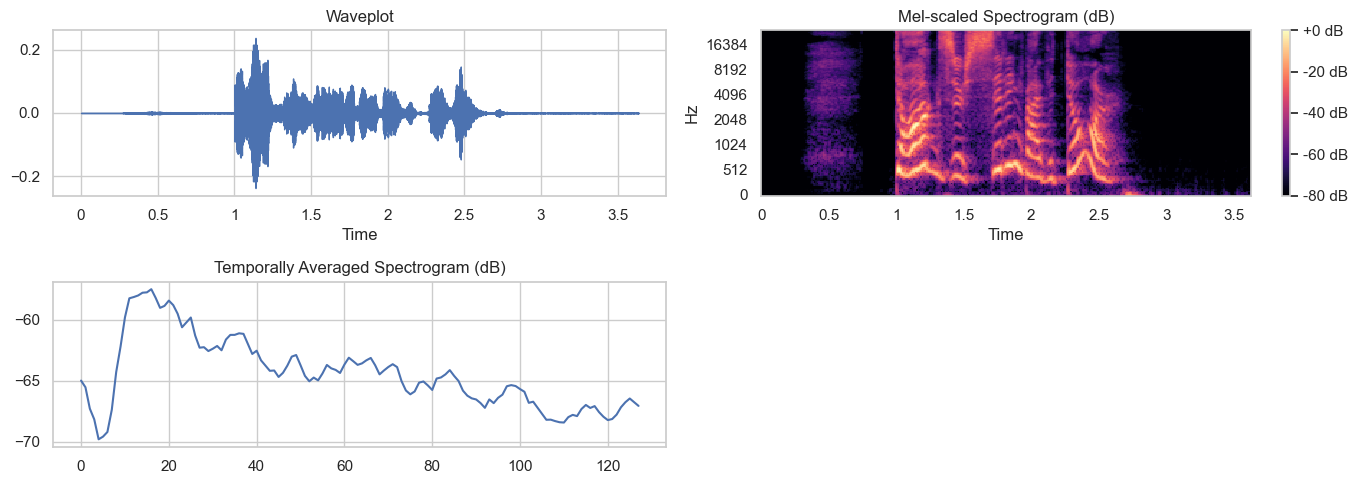

In [40]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Function to compute log-mel spectrogram and temporally average it
def compute_log_mel_spectrogram(file_path, n_mels=128, fmax=8000):
    try:
        # Load the audio file
        y, sr = librosa.load(file_path, sr=None)
        
        # Compute the mel spectrogram
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, fmax=fmax)
        
        # Convert to log scale (dB)
        log_S = librosa.power_to_db(S, ref=np.max)
        
        # Average the log-mel spectrogram values
        avg_log_mel_spectrogram = np.mean(log_S, axis=1)
        
        return avg_log_mel_spectrogram
    
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Function to process audio file and display waveplot and spectrograms
def process_audio_file(file_path):
    try:
        # Load the audio file
        y, sr = librosa.load(file_path, sr=None)
        
        # Plot the waveform
        plt.figure(figsize=(14, 5))
        plt.subplot(2, 2, 1)
        librosa.display.waveshow(y, sr=sr)
        plt.title('Waveplot')
        
        # Compute and plot the mel-scaled spectrogram
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
        S_dB = librosa.power_to_db(S, ref=np.max)
        plt.subplot(2, 2, 2)
        librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Mel-scaled Spectrogram (dB)')
        
        # Compute and plot the temporally averaged spectrogram
        avg_S_dB = np.mean(S_dB, axis=1)
        plt.subplot(2, 2, 3)
        plt.plot(avg_S_dB)
        plt.title('Temporally Averaged Spectrogram (dB)')
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Example usage:
file_path = 'extracted_dataset/Ravdess/audio_speech_actors_01-24/Actor_24/03-01-08-02-02-02-24.wav'
process_audio_file(file_path)

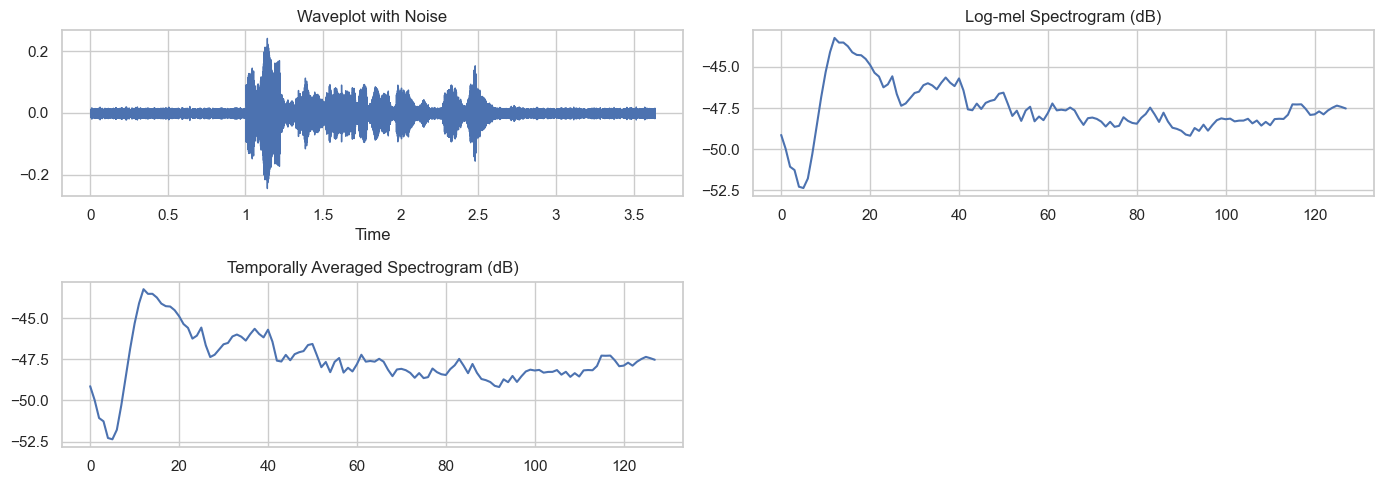

In [41]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Function to compute log-mel spectrogram and temporally average it
def compute_log_mel_spectrogram(y, sr, n_mels=128, fmax=8000):
    try:
        # Compute the mel spectrogram
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, fmax=fmax)
        
        # Convert to log scale (dB)
        log_S = librosa.power_to_db(S, ref=np.max)
        
        # Average the log-mel spectrogram values
        avg_log_mel_spectrogram = np.mean(log_S, axis=1)
        
        return avg_log_mel_spectrogram
    
    except Exception as e:
        print(f"Error computing log-mel spectrogram: {e}")
        return None

# Function to add noise to audio
def add_noise(y, noise_level=0.005):
    # Generate random noise with the same length as y
    noise = np.random.normal(0, noise_level, len(y))
    
    # Add noise to the audio signal
    y_noisy = y + noise
    
    return y_noisy

# Function to process audio file, add noise, and display waveplot and spectrograms
def process_audio_file(file_path, noise_level=0.005):
    try:
        # Load the audio file
        y, sr = librosa.load(file_path, sr=None)
        
        # Add noise to the audio
        y_noisy = add_noise(y, noise_level=noise_level)
        
        # Plot the waveform
        plt.figure(figsize=(14, 5))
        plt.subplot(2, 2, 1)
        librosa.display.waveshow(y_noisy, sr=sr)
        plt.title('Waveplot with Noise')
        
        # Compute and plot the mel-scaled spectrogram
        avg_log_mel_spectrogram = compute_log_mel_spectrogram(y_noisy, sr)
        plt.subplot(2, 2, 2)
        plt.plot(avg_log_mel_spectrogram)
        plt.title('Log-mel Spectrogram (dB)')
        
        # Compute and plot the temporally averaged spectrogram
        plt.subplot(2, 2, 3)
        S = librosa.feature.melspectrogram(y=y_noisy, sr=sr, n_mels=128, fmax=8000)
        S_dB = librosa.power_to_db(S, ref=np.max)
        avg_S_dB = np.mean(S_dB, axis=1)
        plt.plot(avg_S_dB)
        plt.title('Temporally Averaged Spectrogram (dB)')
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Example usage:
file_path = 'extracted_dataset/Ravdess/audio_speech_actors_01-24/Actor_24/03-01-08-02-02-02-24.wav'
process_audio_file(file_path, noise_level=0.005)

Accuracy: 0.6319444444444444
Classification Report:
               precision    recall  f1-score   support

       angry       0.82      0.67      0.74        42
        calm       0.59      0.82      0.69        44
     disgust       0.50      0.81      0.62        32
        fear       0.69      0.69      0.69        32
       happy       0.43      0.38      0.41        34
     neutral       0.69      0.55      0.61        20
         sad       0.67      0.56      0.61        39
    surprise       0.80      0.53      0.64        45

    accuracy                           0.63       288
   macro avg       0.65      0.63      0.62       288
weighted avg       0.66      0.63      0.63       288



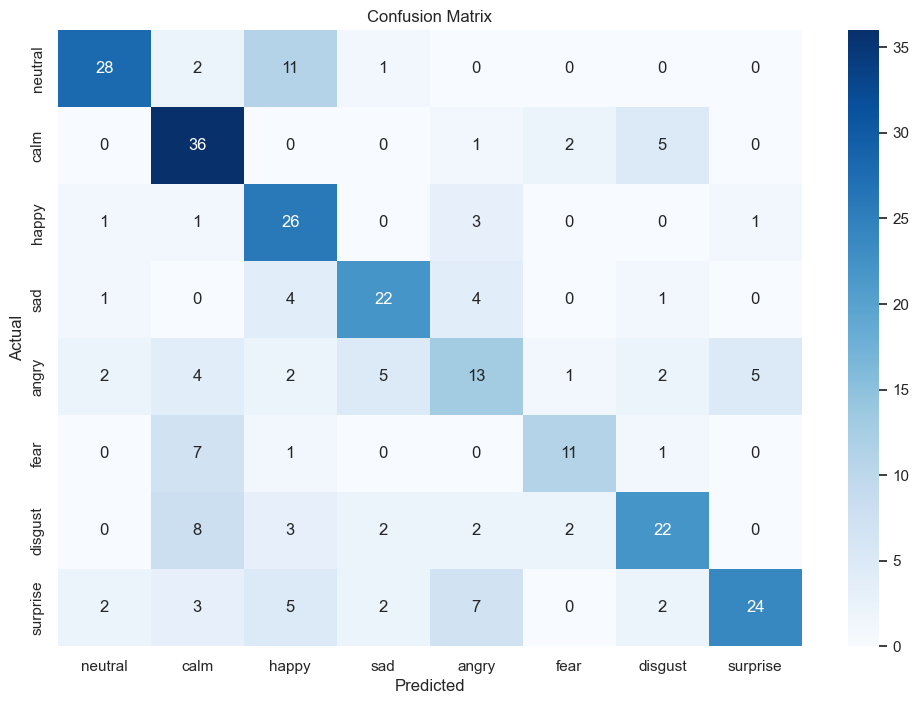

In [42]:
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

# Function to extract MFCC features
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    mfccs_scaled = np.mean(mfccs.T, axis=0)
    return mfccs_scaled

# Assuming Ravdess_df is your dataframe with 'Path' and 'Emotions' columns
features = []
labels = []

for index, row in Ravdess_df.iterrows():
    file_path = row['Path']
    emotion = row['Emotions']
    mfccs = extract_features(file_path)
    features.append(mfccs)
    labels.append(emotion)

# Convert to numpy arrays
X = np.array(features)
y = np.array(labels)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_emotions, yticklabels=unique_emotions)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()